In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from data_download import yqd

import matplotlib.pyplot as plt
import matplotlib.dates as mlbdt
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import quotes_historical_yahoo_ohlc, candlestick_ohlc

    

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
dfchart=yqd.load_yahoo_quote('AAPL', '20160101', '20171201')

In [4]:
def addindicators(df):

    df['SMA10']=df['Close'].rolling(window=10).mean()
    df['SMA10']=df['SMA10'].astype(float)
    
    df['SMA20']=df['Close'].rolling(window=20).mean()
    df['SMA20']=df['SMA20'].astype(float)
    
    df['SMA50']=df['Close'].rolling(window=50).mean()
    df['SMA50']=df['SMA50'].astype(float)
    
    df['SMA100']=df['Close'].rolling(window=100).mean()
    df['SMA100']=df['SMA100'].astype(float)
    
    df['SMA200']=df['Close'].rolling(window=200).mean()
    df['SMA200']=df['SMA200'].astype(float)
    
    df['SMAstd10']=df['Close'].rolling(window=10).std()
    df['SMAstd10']=df['SMAstd10'].astype(float)
    
    df['EMA8']=df['Close'].ewm(span=8).mean()
    df['EMA8']=df['EMA8'].astype(float)
        
    df['VolSMA10']=df['Volume'].rolling(window=10).mean()
    df['VolSMA10']=df['VolSMA10'].astype(float)

    
    return df



def get3monthback(df,T):
    return df.loc[(T-pd.DateOffset(90)).date():T,:].copy()


from matplotlib import gridspec
def plotchart(df):


    # (Year, month, day) tuples suffice as args for quotes_historical_yahoo
    date1 = (2004, 2, 1)
    date2 = (2004, 4, 12)


    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
    dayFormatter = DateFormatter('%d')      # e.g., 12

#     quotes = quotes_historical_yahoo_ohlc('INTC', date1, date2)
#     if len(quotes) == 0:
#         raise SystemExit
    
    plt.figure(figsize=(10,7))
    gs = gridspec.GridSpec(4, 1) 
#     fig.subplots_adjust(bottom=0.2)
    ax=[plt.subplot(gs[0]),plt.subplot(gs[1:])]
    ax[1].xaxis.set_major_locator(mondays)
#     ax.xaxis.set_minor_locator(None)
    ax[1].xaxis.set_major_formatter(weekFormatter)
    #ax.xaxis.set_minor_formatter(dayFormatter)
    
    ax[0].xaxis.set_major_locator(mondays)
    ax[0].xaxis.set_major_formatter(weekFormatter)
    
    
    #plot_day_summary(ax, quotes, ticksize=3)
    df['Date']=df.index
    df['Date']=df['Date'].apply(lambda x: mlbdt.date2num(x))
    candlestick_ohlc(ax[1], [tuple(x) for x in df[['Date','Open','High','Low','Close']].to_records(index=False)], width=0.6)
    ax[1].plot(df['Date'],df['EMA8'],linewidth=0.2)
    ax[1].plot(df['Date'],df['SMA10'],linewidth=0.5)
    ax[1].plot(df['Date'],df['SMA20'],linewidth=0.5)
    ax[1].plot(df['Date'],df['SMA50'],linewidth=0.5)
    ax[1].plot(df['Date'],df['SMA100'],linewidth=1,linestyle='--')
    ax[1].plot(df['Date'],df['SMA200'],linewidth=1,linestyle='--')
    ax[1].xaxis_date()
    ax[1].grid()
    ax[1].autoscale_view()
    
    dd=pd.DataFrame()
    dd=df[['Volume','Date']].copy()
    dd['Low']=0
    dd['High']=dd['Volume']
    dd['Open']=df['Open']-df['Low']
    dd['Close']=df['Close']-df['Low']
    
    candlestick_ohlc(ax[0], [tuple(x) for x in dd[['Date','Open','High','Low','Close']].to_records(index=False)], width=0.6)
    ax[0].plot(df['Date'],df['VolSMA10'],linewidth=1)    
    

    ax[0].grid()
        
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

    plt.show()




In [5]:
L=os.listdir('ppvw')
import collections as clt
PPV=[]
for f in L:
    T=pd.to_datetime(f.split('.')[1],format="%Y%m%d").date()
    print 'ppvw/'+f
    dfppv=pd.read_csv('ppvw/'+f)
    dd=dfppv[['symbol','date']].copy()
    dd['date']=T
    PPV=PPV+dd.to_records(index=False).tolist()
dfPPV=pd.DataFrame(PPV,columns=['Symbol','Date'])

OSError: [Errno 2] No such file or directory: 'ppvw'

In [34]:
PPV

[('AAWW', datetime.date(2018, 1, 10)),
 ('ABG', datetime.date(2018, 1, 10)),
 ('ADVM', datetime.date(2018, 1, 10)),
 ('AFSI', datetime.date(2018, 1, 10)),
 ('AGEN', datetime.date(2018, 1, 10)),
 ('AGIO', datetime.date(2018, 1, 10)),
 ('AGRX', datetime.date(2018, 1, 10)),
 ('AKS', datetime.date(2018, 1, 10)),
 ('ALDR', datetime.date(2018, 1, 10)),
 ('AMD', datetime.date(2018, 1, 10)),
 ('AMRS', datetime.date(2018, 1, 10)),
 ('ANAB', datetime.date(2018, 1, 10)),
 ('ANET', datetime.date(2018, 1, 10)),
 ('ANGI', datetime.date(2018, 1, 10)),
 ('APPN', datetime.date(2018, 1, 10)),
 ('AREX', datetime.date(2018, 1, 10)),
 ('ARNA', datetime.date(2018, 1, 10)),
 ('ARRY', datetime.date(2018, 1, 10)),
 ('ATHX', datetime.date(2018, 1, 10)),
 ('ATUS', datetime.date(2018, 1, 10)),
 ('AZPN', datetime.date(2018, 1, 10)),
 ('BB', datetime.date(2018, 1, 10)),
 ('BCRX', datetime.date(2018, 1, 10)),
 ('BIVV', datetime.date(2018, 1, 10)),
 ('BJRI', datetime.date(2018, 1, 10)),
 ('BLCM', datetime.date(2018, 

In [66]:
dfchart={}
for symb in dfPPV['Symbol'].unique():
    print symb
    dfchart[symb]=yqd.load_yahoo_quote(symb, '20140101', '20180120')

AAWW
ABG
ADVM
AFSI
AGEN
AGIO
AGRX
AKS
ALDR
AMD
AMRS
ANAB
ANET
ANGI
APPN
AREX
ARNA
ARRY
ATHX
ATUS
AZPN
BB
BCRX
BIVV
BJRI
BLCM
BOLD
BOOT
BPI
BTX
BURG
CALM
CASY
CBI
CCIH
CDXS
CERS
CHRS
CLDR
CMC
CMCM
CNET
CNSL
COGT
CORE
CORT
CRBP
CROX
CSTE
CTL
CVE
DBD
DELT
DISCA
DISCK
DORM
DQ
DSS
DST
DSX
EEFT
ELLI
EMES
ENDP
ENR
EPZM
EXAS
FATE
FCAU
FLDM
FOLD
FTFT
GBT
GCAP
GSUM
GTE
GTLS
HAWK
HBM
HMNY
HRG
HRTX
HTGM
IART
ILMN
INSY
IPGP
ISRG
ITCI
IZEA
JCP
JMEI
JRJC
KALA
KOPN
KOSS
LABD
LPTH
LTEA
MARK
MB
MCF
MDC
MDXG
MHLD
MJX
MTBC
MYOK
NBEV
NEPT
NKTR
NOG
NVAX
NVDA
NVRO
NVTA
OLED
OMF
OSTK
OXLC
PAH
PES
PODD
PTCT
PTIE
REN
RENN
RIG
RTRX
RXN
SAH
SAND
SB
SBGI
SCG
SCHN
SGRY
SHAK
SHLD
SIFY
SND
SPB
SQNS
SRNE
SSC
SSNC
STX
TA
TEAM
TEUM
TGB
TMHC
TNDM
TOO
TPH
TRVN
TSLA
TTOO
UAL
UAN
UCBI
VBLT
VCEL
VIPS
VNET
VUZI
WATT
WES
WING
WIX
WLH
WTI
WTW
XNET
XON
XXII
ZAGG
ZUMZ
AMBC
AMPE
APTO
AXAS
CBIO
CERC
CLMT
CRK
CRSP
CVRR
EPE
ESPR
EURN
FND
GNC
GNRT
GORO
HOV
IPI
KLXI
LBY
LINU
MTL
NXTD
OTEX
PIRS
PRTY
PTI
QIWI
QTNA
RXDX
SCMP
SD
SFUN
SGH
S

In [68]:
import pickle as pkl
pkl.dump(dfchart,open( "dfchart.pkl", "w" ))

In [70]:
for symb in dfchart:
    dfchart[symb]=addindicators(dfchart[symb])

2018-01-10 AAWW 102.0 100.0


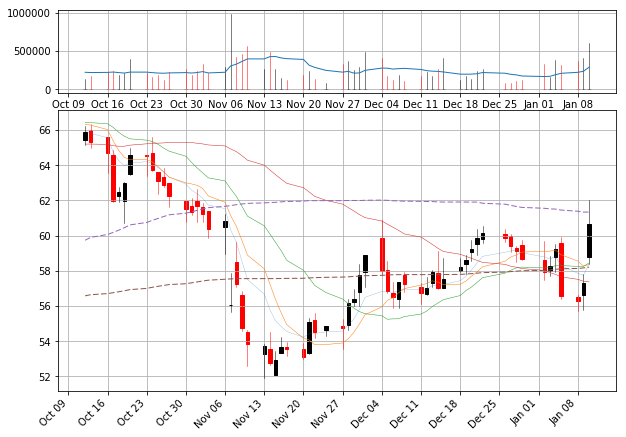

2018-01-10 ABG 106.0 100.0


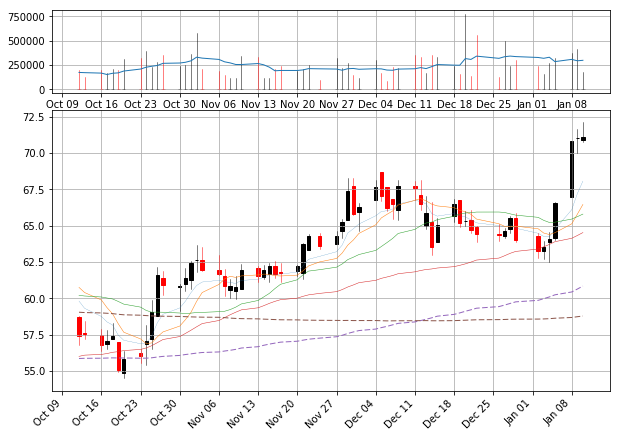

2018-01-10 ADVM 100.0 93.0


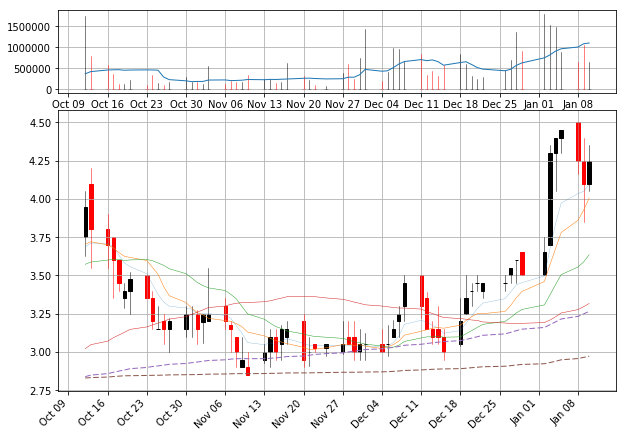

2018-01-10 AFSI 103.0 99.0


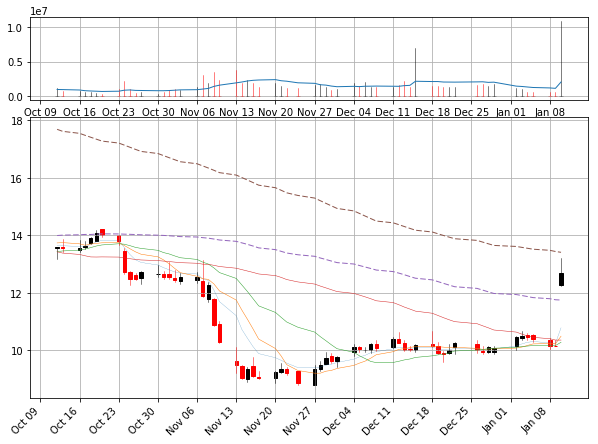

2018-01-10 AGEN 100.0 99.0


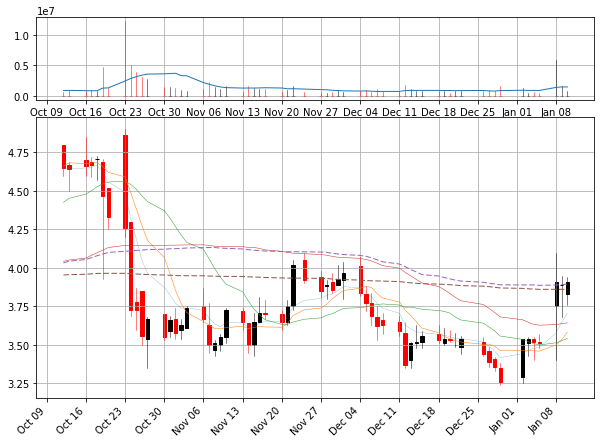

2018-01-10 AGIO 112.0 100.0


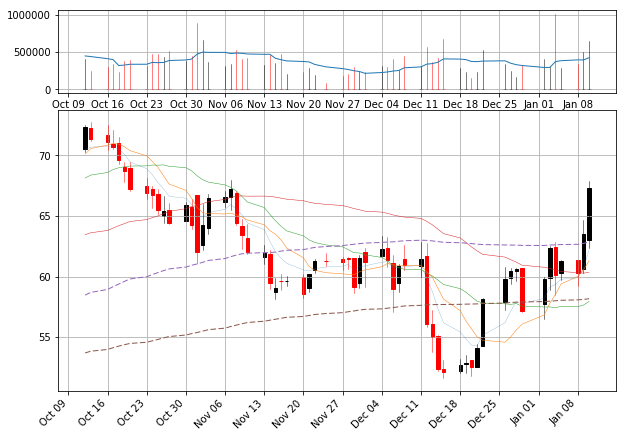

2018-01-10 AGRX 107.0 100.0


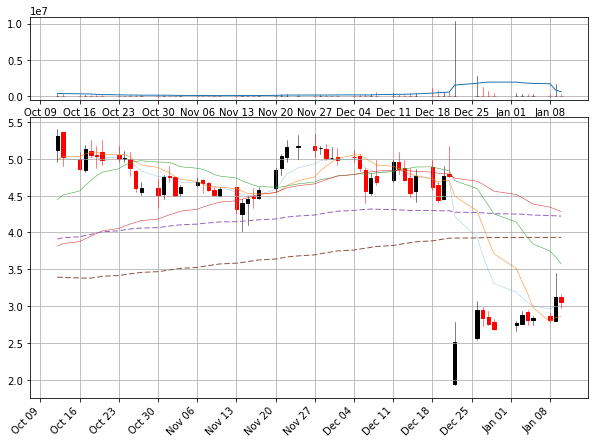

2018-01-10 AKS 100.0 96.0


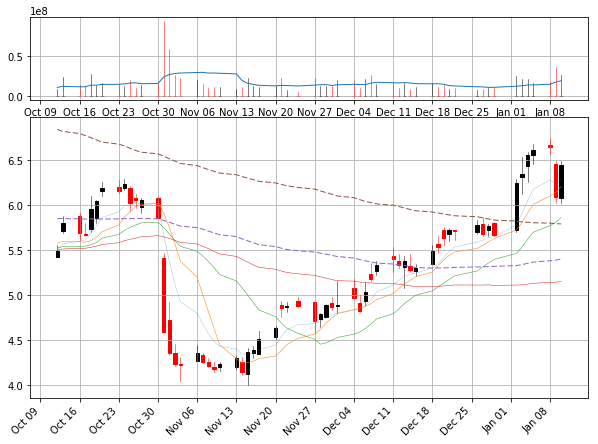

2018-01-10 ALDR 103.0 100.0


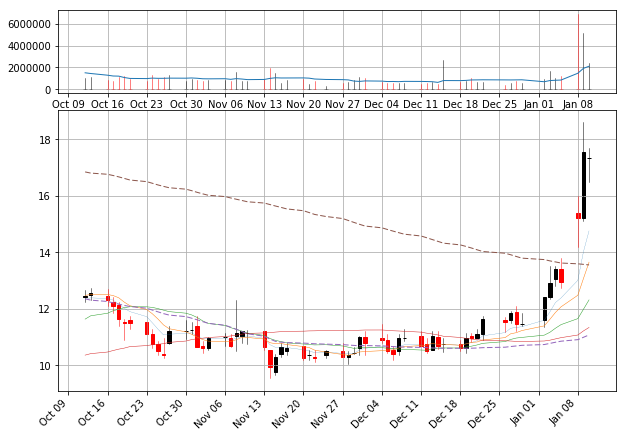

2018-01-10 AMD 102.0 100.0


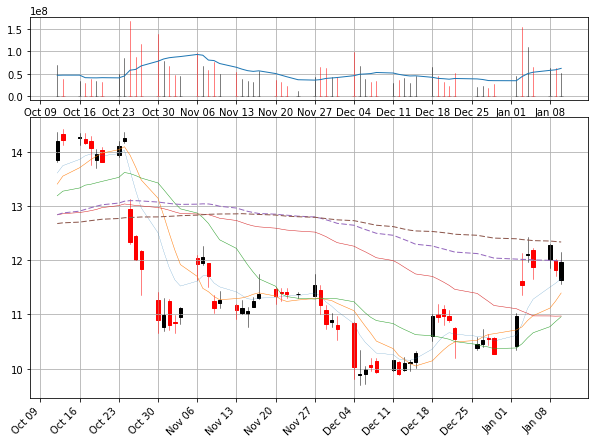

2018-01-10 AMRS 100.0 92.0


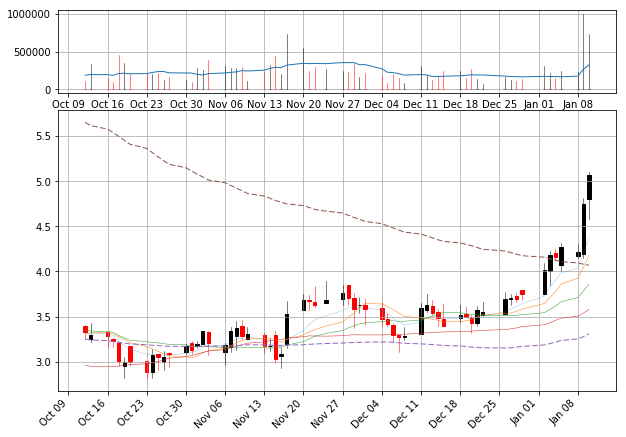

2018-01-10 ANAB 101.0 99.0


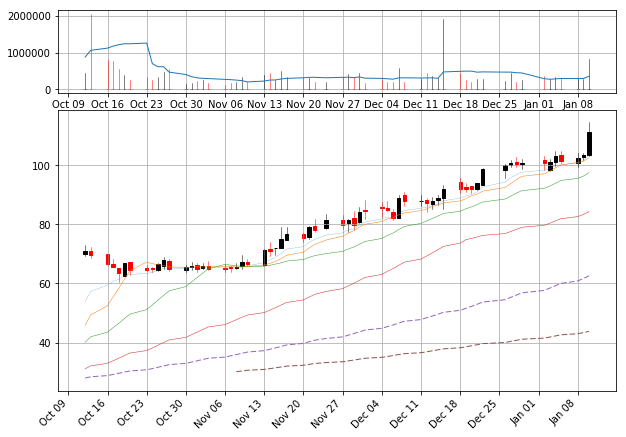

2018-01-10 ANET 103.0 100.0


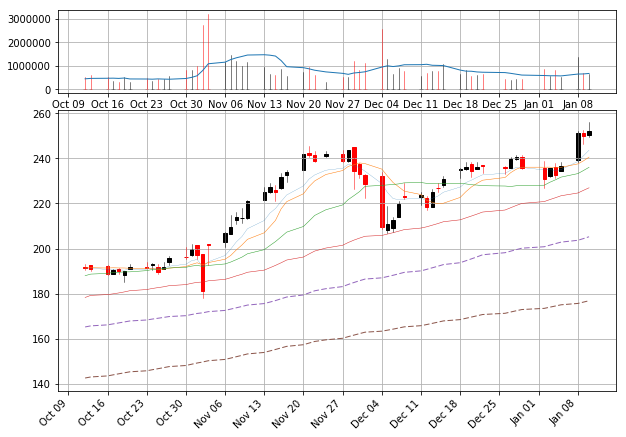

2018-01-10 ANGI 102.0 100.0


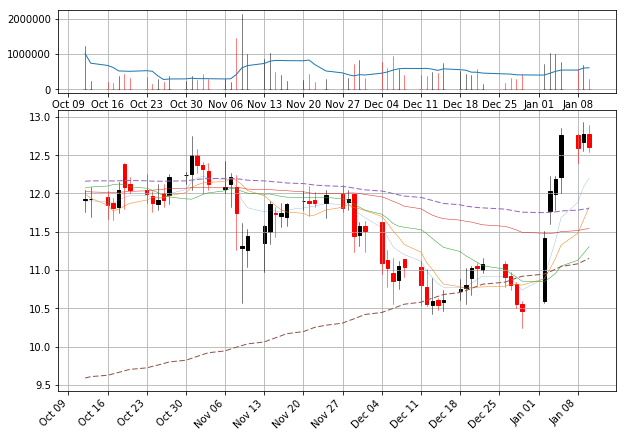

2018-01-10 APPN 106.0 100.0


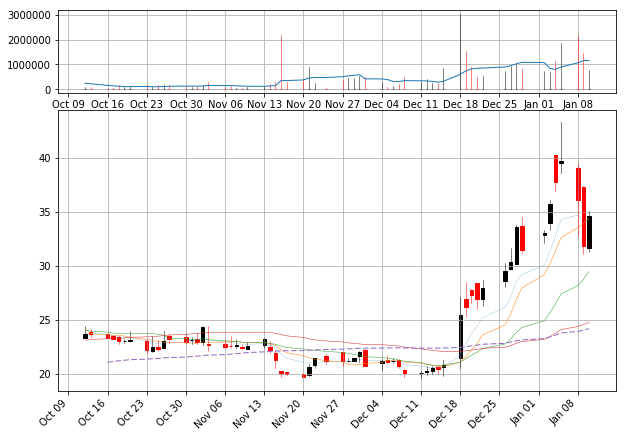

2018-01-10 AREX 111.0 100.0


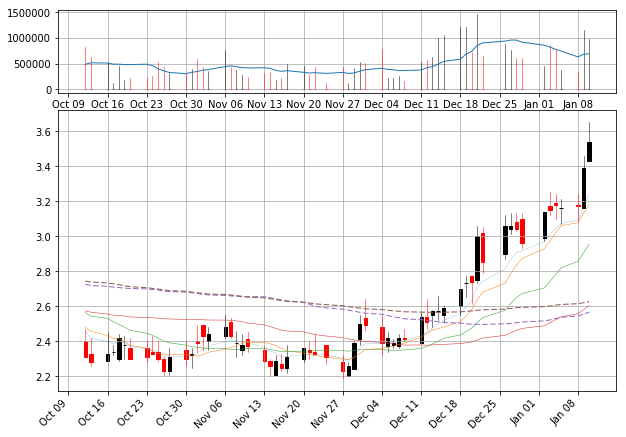

2018-01-10 ARNA 100.0 89.0


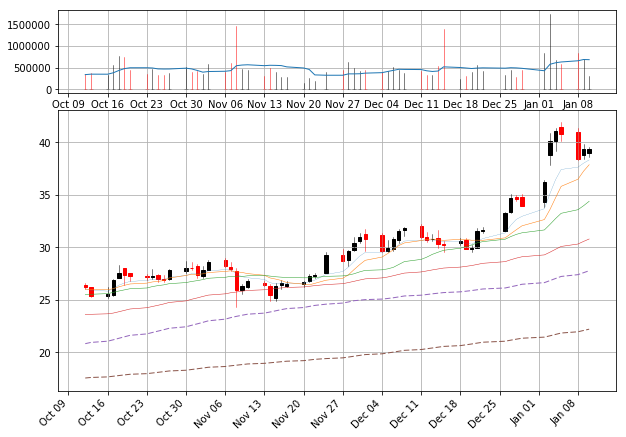

2018-01-10 ARRY 100.0 98.0


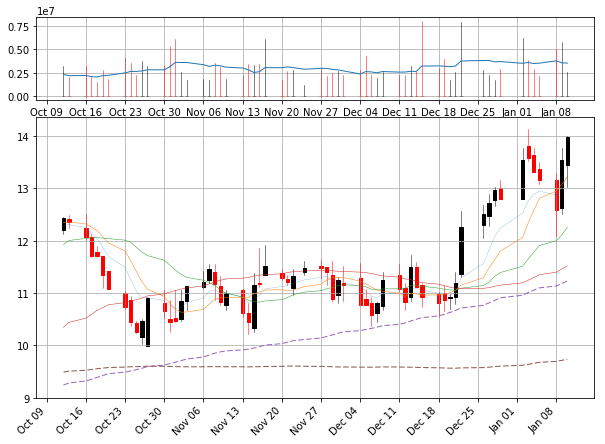

2018-01-10 ATHX 102.0 100.0


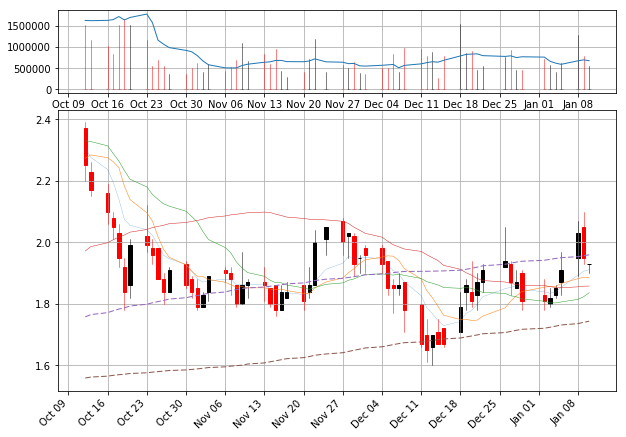

2018-01-10 ATUS 102.0 100.0


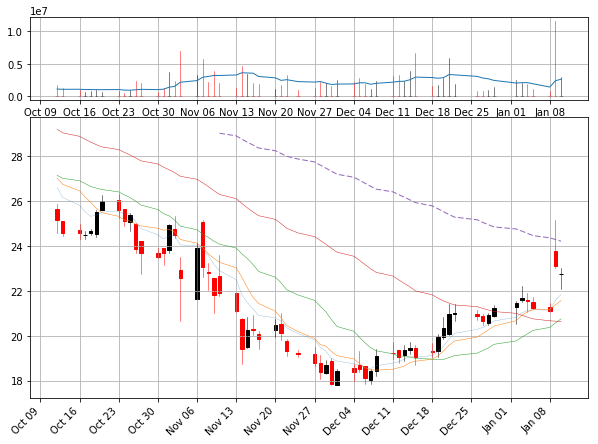

2018-01-10 AZPN 103.0 100.0


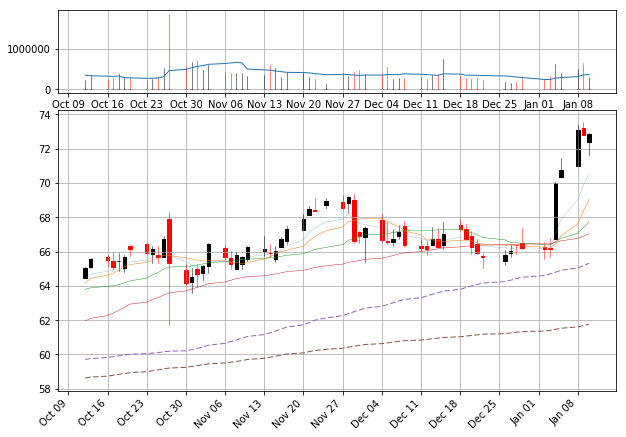

2018-01-10 BB 100.0 98.0


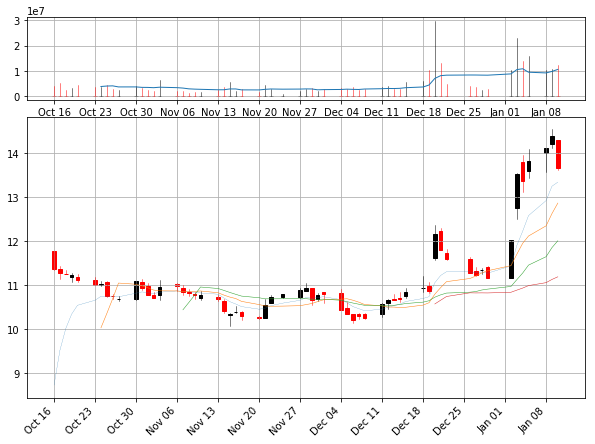

2018-01-10 BCRX 103.0 100.0


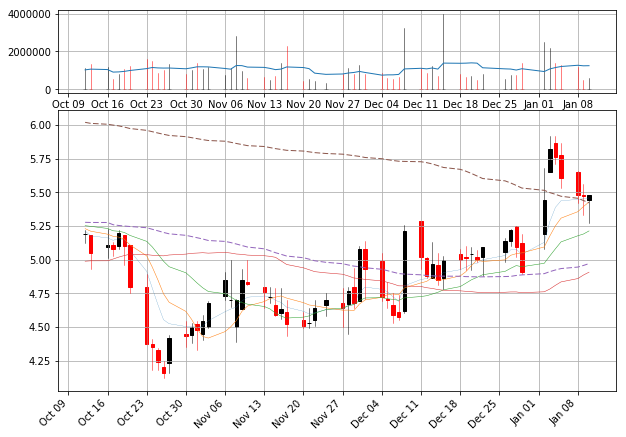

2018-01-10 BIVV 109.0 100.0


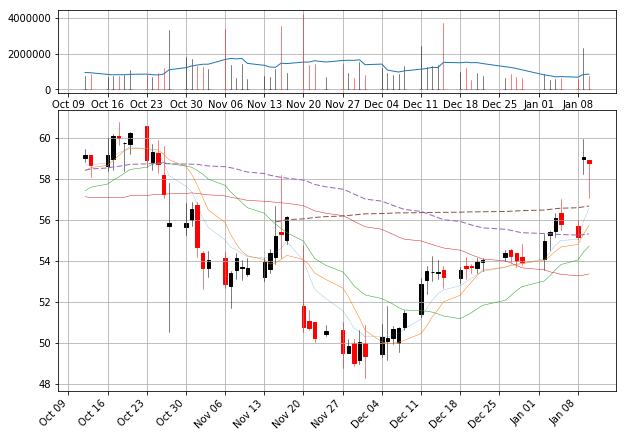

2018-01-10 BJRI 102.0 100.0


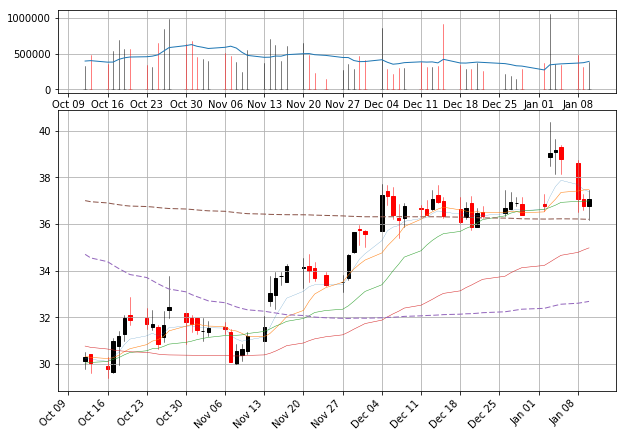

2018-01-10 BLCM 101.0 100.0


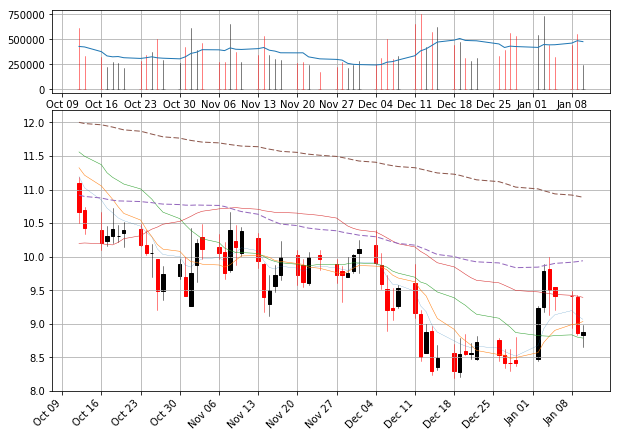

2018-01-10 BOLD 111.0 100.0


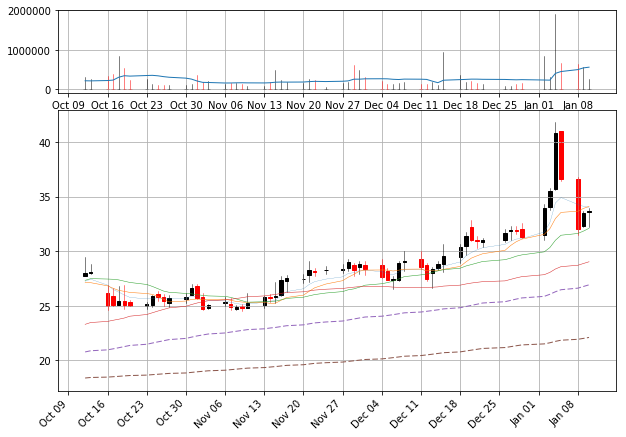

2018-01-10 BOOT 105.0 100.0


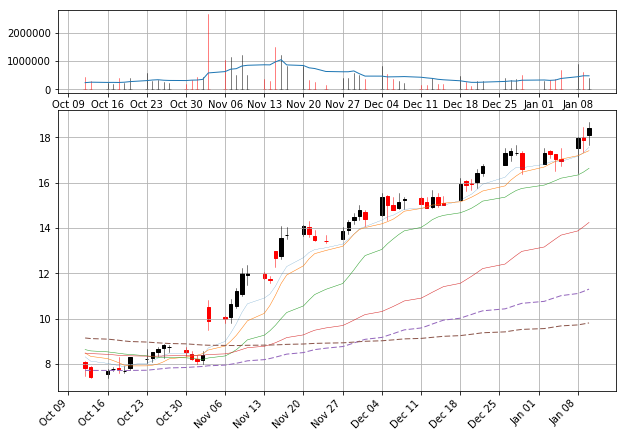

2018-01-10 BPI 105.0 100.0


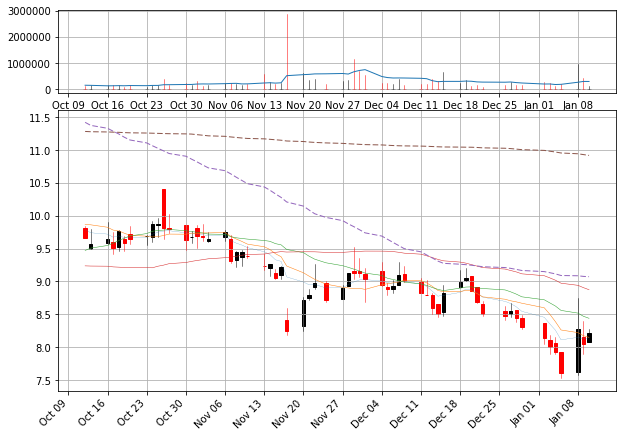

2018-01-10 BTX 101.0 100.0


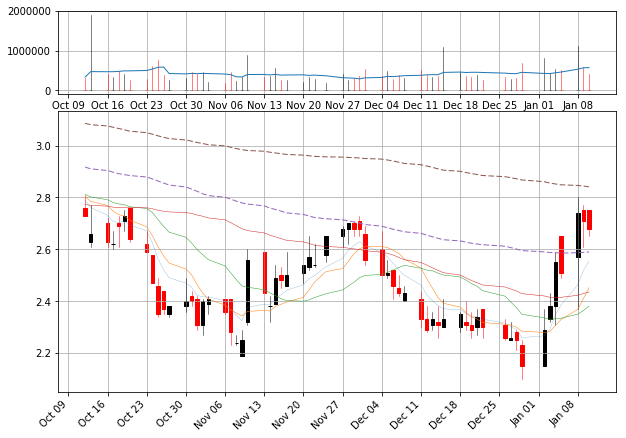

2018-01-10 BURG 100.0 92.0


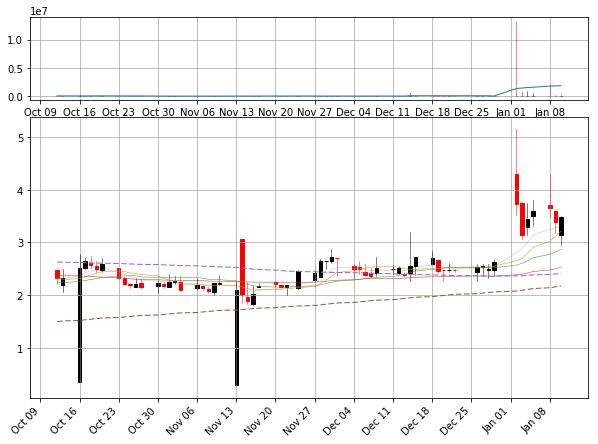

2018-01-10 CALM 104.0 100.0


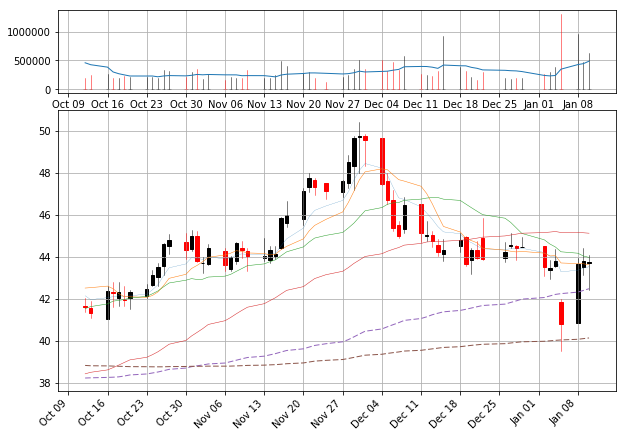

2018-01-10 CASY 103.0 100.0


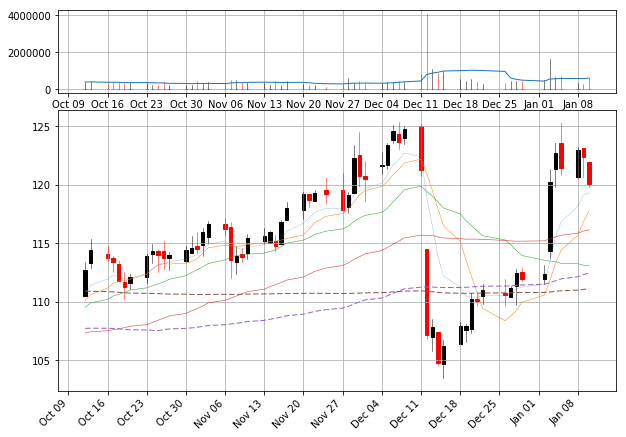

2018-01-10 CBI 104.0 100.0


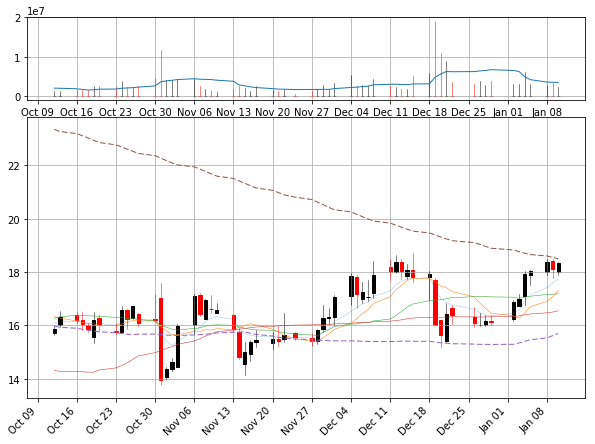

2018-01-10 CCIH 106.0 99.0


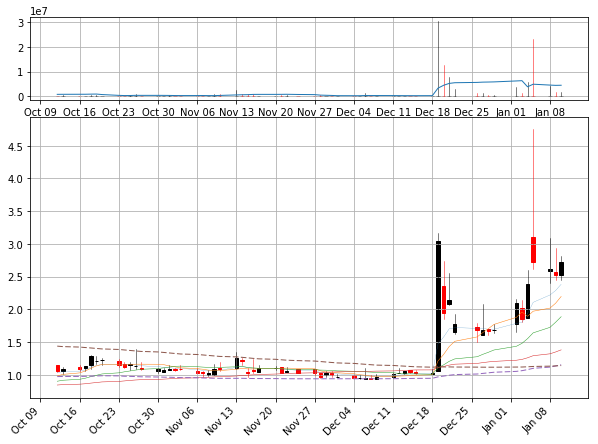

2018-01-10 CDXS 100.0 99.0


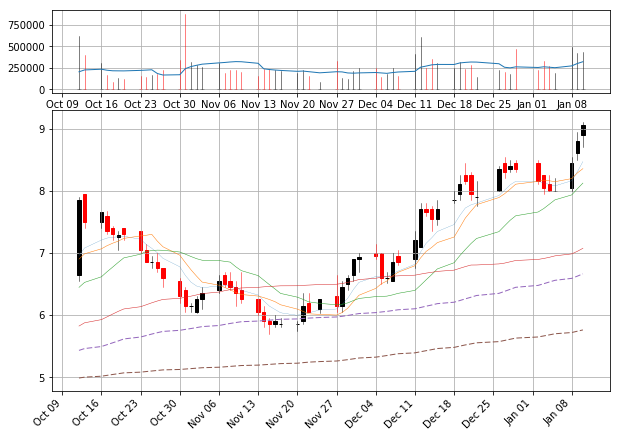

2018-01-10 CERS 103.0 100.0


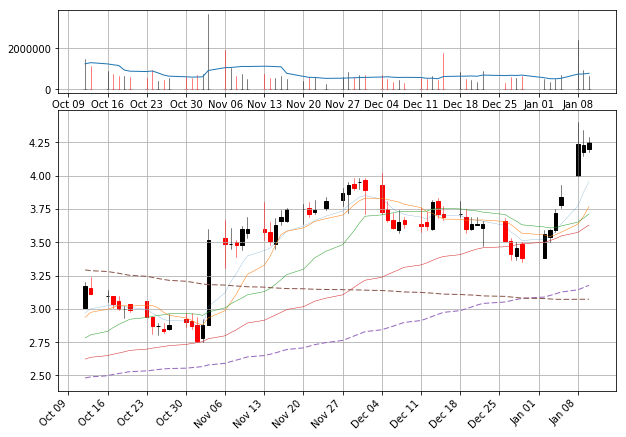

2018-01-10 CHRS 111.0 100.0


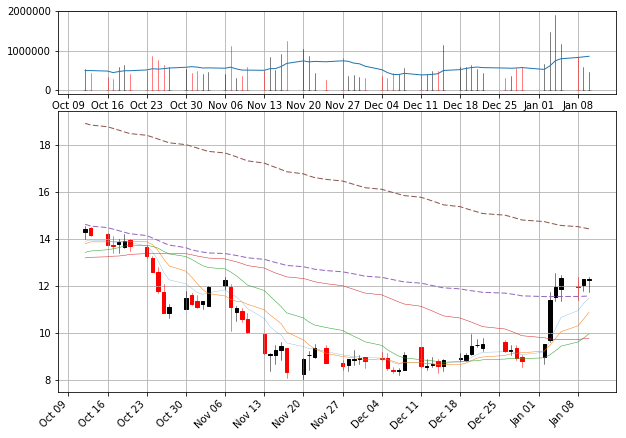

2018-01-10 CLDR 100.0 98.0


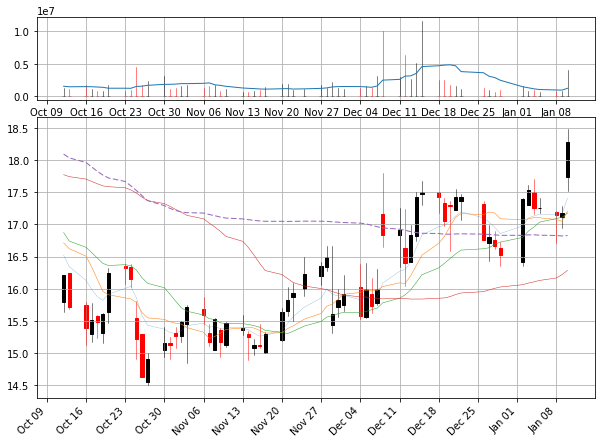

2018-01-10 CMC 102.0 100.0


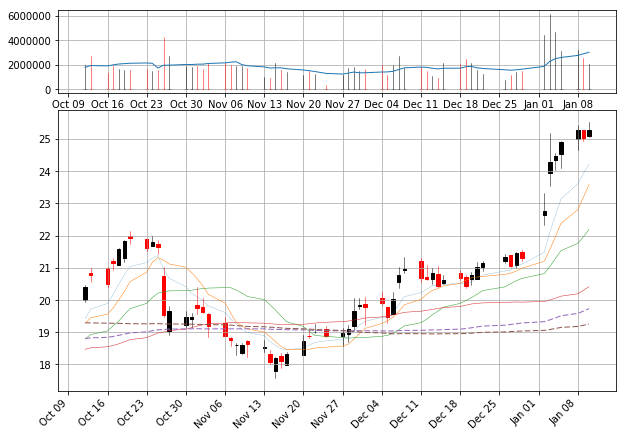

2018-01-10 CMCM 111.0 100.0


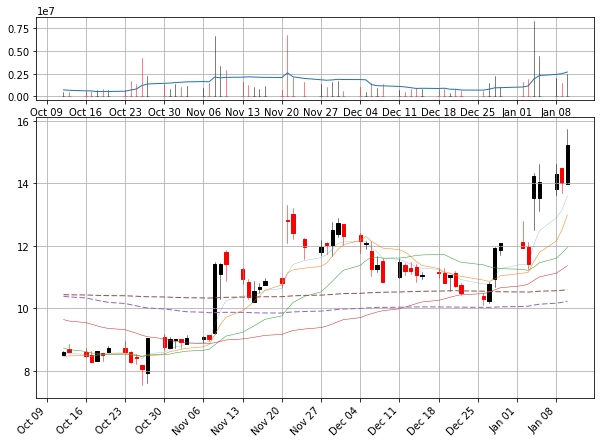

2018-01-10 CNET 127.0 95.0


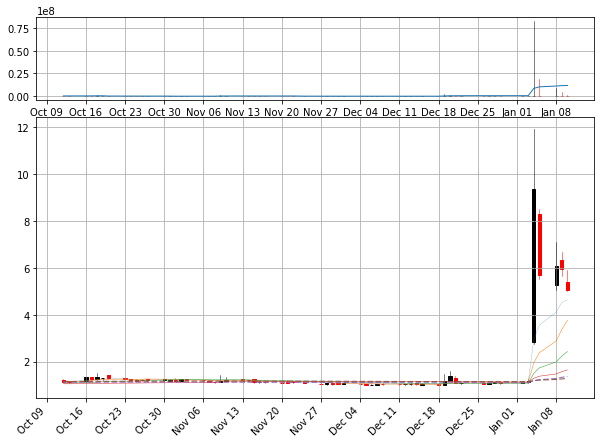

2018-01-10 CNSL 102.0 100.0


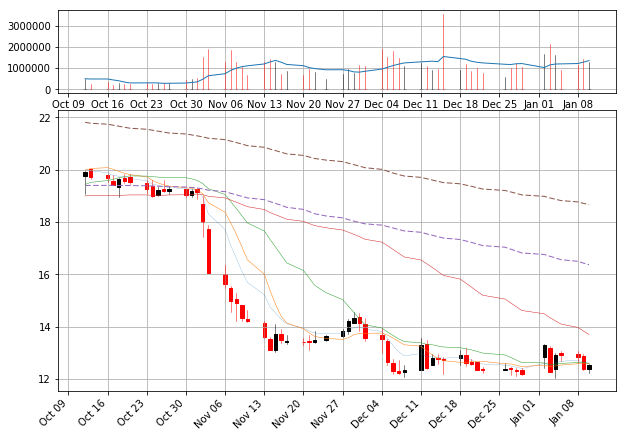

2018-01-10 COGT 100.0 89.0


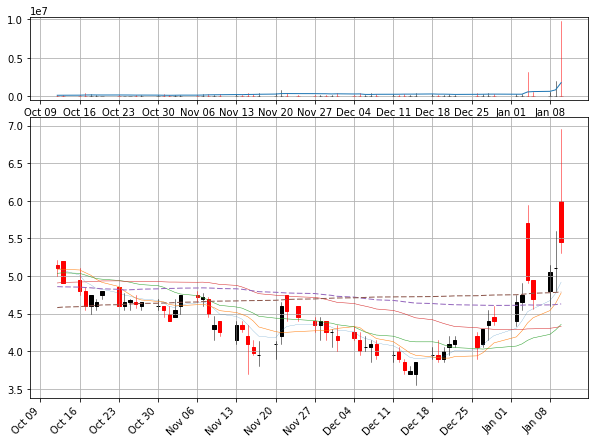

2018-01-10 CORE 101.0 99.0


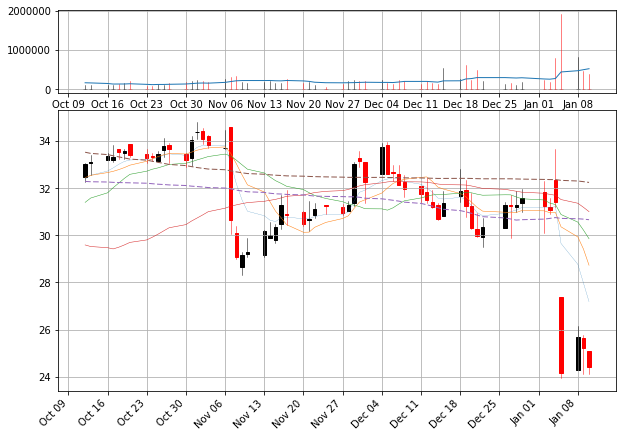

2018-01-10 CORT 100.0 99.0


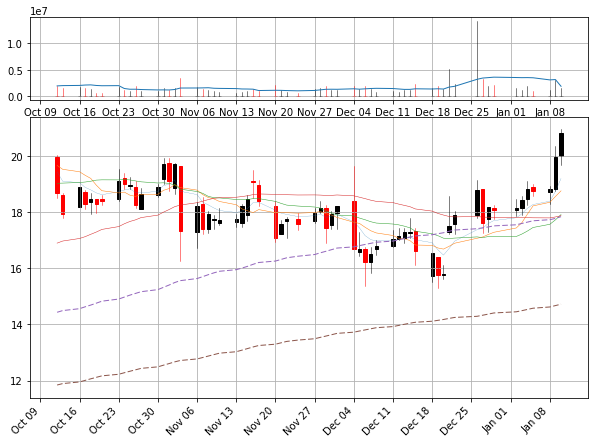

2018-01-10 CRBP 103.0 100.0


In [ ]:
for ind in dfPPV.index:
    symb=dfPPV.loc[ind,'Symbol']
    T=dfPPV.loc[ind,'Date']
    ret=dfchart[symb].loc[T:(T+pd.DateOffset(5)).date(),'Close']
    
    print T,symb,np.round( max(ret/ret.iloc[0])*100 ),np.round( min(ret/ret.iloc[0])*100 )
    plotchart(get3monthback(dfchart[symb],T))


In [73]:
dfPPV['Date'].unique()

array([datetime.date(2018, 1, 10), datetime.date(2017, 12, 29),
       datetime.date(2018, 1, 2), datetime.date(2018, 1, 4),
       datetime.date(2018, 1, 11), datetime.date(2018, 1, 9),
       datetime.date(2018, 1, 3), datetime.date(2018, 1, 12)], dtype=object)